# Tasks

### Task 1

In [1]:
import random

# Generates random string made up of characters in 'ACTG'
def generate_dna(n = 400):
    return ''.join(random.choices("ACTG", k = n))

### Task 2

In [2]:
def EditDistance(X, Y):
    m = len(X)
    n = len(Y)
    c = [[0] * (n + 1) for _ in range(m + 1)] # Create matrix c with size (m+1) x (n+1), initialized to zero
    
    for i in range(m + 1): # Initialize the base case
        c[i][0] = i  # Cost of deleting all characters from X to match empty Y
    for j in range(n + 1):
        c[0][j] = j  # Cost of inserting all characters of Y to match empty X
    
    # Compute Edit Distance
    for i in range(1, m + 1): # loop through the length of X
        for j in range(1, n + 1): # loop through the length of y
            if X[i-1] == Y[j-1]: 
                cost = 0  # No cost if characters are the same
            else:
                cost = 1 # cost for substitution  # Cost of 1 for a substitution
            
            c[i][j] = min(c[i-1][j-1] + cost, # Substitution
                          c[i-1][j] + 1,  # cost for deletion
                          c[i][j-1] + 1) #cost for insertion
    
    return c[m][n]  # Edit distance is bottom right cell as it acts as the total

### Task 3

In [3]:
DNA = [] # create empty list for DNA strands to be stored
for i in range(20): # loop 20 times to create 20 DNA strands
    DNA.append(generate_dna()) # calling function to create DNA strand and add it to the list

In [4]:
distances = [] # create empty list for edit distances to be stored in

for i in range(len(DNA)): # loop to iterate through DNA strands
    for j in range(i + 1, len(DNA)): # loops through the DNA strands that have not been looped through yet in i
        distances.append(EditDistance(DNA[i], DNA[j])) # calculate edit distances and add them to the list

### Task 4

213.93684210526317


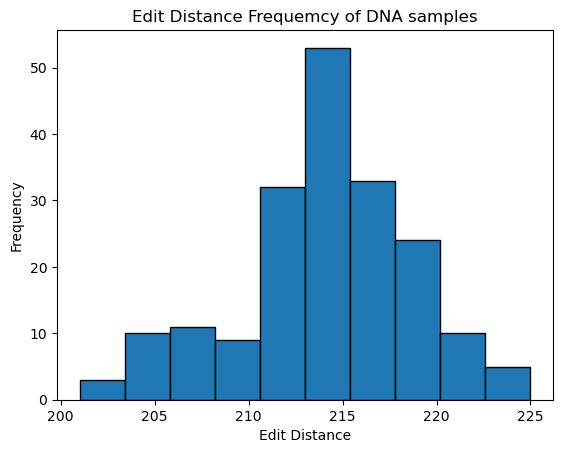

In [10]:
import matplotlib.pyplot as plt

plt.hist(distances, edgecolor = 'black') # creates histogram
plt.title('Edit Distance Frequemcy of DNA samples')
plt.xlabel('Edit Distance') # x-axis label
plt.ylabel('Frequency') # y-axis label

mean_distance = sum(distances)/len(distances) # calculating sum
print(mean_distance)

# Real Life Data

In [7]:
from Bio import Entrez, SeqIO

Entrez.email = "cacultice@ucdavis.edu"

# Dictionary of species and their GenBank numbers
species_data = {
    "German Neanderthal": "AF011222",
    "Russian Neanderthal": "AF254446",
    "European Human": "X90314",
    "Mountain Gorilla Rwanda": "AF089820",
    "Chimp Troglodytes": "AF176766",
    "Puti Orangutan": "AF451972",
    "Jari Orangutan": "AF451964",
    "Western Lowland Gorilla": "AY079510",
    "Eastern Lowland Gorilla": "AF050738",
    "Chimp Schweinfurthii": "AF176722",
    "Chimp Vellerosus": "AF315498",
    "Chimp Verus": "AF176731"
}

# Fetch FASTA sequences
def fetch_fasta(accession):
    handle = Entrez.efetch(db = "nucleotide", id = accession, rettype = "fasta", retmode = "text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq)  # Return as string

# Store in dictionary
real_dna_sequences = {species: fetch_fasta(acc) for species, acc in species_data.items()}

In [8]:
real_distances = [] # initialize list to store GenBank DNA
species_list = list(real_dna_sequences.keys()) # list GenBank species keys

for i in range(len(species_list)): # loop to iterate through DNA strands
    for j in range(i + 1, len(species_list)): # loops through the DNA strands that have not been looped through yet in i
        real_distances.append(EditDistance(real_dna_sequences[species_list[i]], real_dna_sequences[species_list[j]])) # calculate edit distances and add them to the list

122.53030303030303


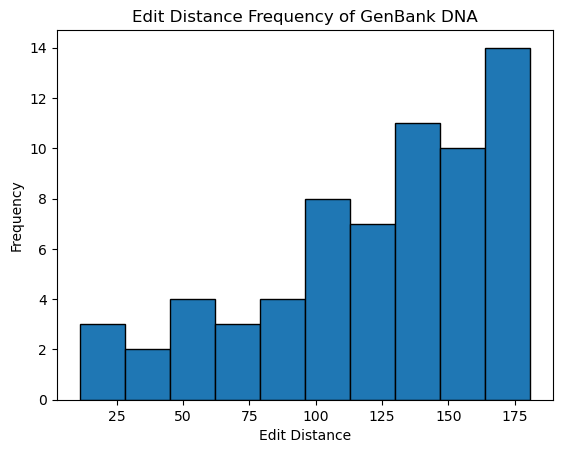

In [11]:
plt.hist(real_distances, edgecolor = 'black') # creates histogram
plt.title('Edit Distance Frequency of GenBank DNA')
plt.xlabel('Edit Distance') # x-axis label
plt.ylabel('Frequency') # y-axis label

mean_distance = sum(real_distances)/len(real_distances) # calculating sum
print(mean_distance)

Clearly the edit distance is much lower for the real DNA sequences compared to my randomly generated ones (213.9 vs 122.5).
This makes sense as human species are closely related to each other so having significantly closer DNA sequences is expected 
compared to the randomly generated ones.

Looking at the first graph (random DNA seqences), it is clear that they form a normal distribution and are relatively normally distributed with small bumpiness caused by the small sample size. This is appropriate since they are randomly generated. For the real DNA, the graph is strongly skewed left which is interesting. The lower numbers make sense as human species are closely related. The edit distances being skewed left means that some human species on this list were closer linked than others, but for the most part are more different.